In [1]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(12)
tf.random.set_seed(12)

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Reshape
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
import DataStore

ds = DataStore.DataStore("data", 5)

In [3]:
ds.trainData['A-1'].shuffle()
len(ds.trainData['A-1'].x)

2874

In [4]:
X_train = ds.trainData['A-1'].x
Y_train = ds.trainData['A-1'].y

In [5]:
X_train.shape

(2874, 5, 25)

In [6]:
Y_train[0].shape

(25,)

In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.add(tf.keras.layers.Cropping1D(cropping=2))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23040     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 64)             33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 25)             1625      
_________________________________________________________________
cropping1d (Cropping1D)      (None, 1, 25)             0

In [8]:
history = model.fit(X_train, Y_train, epochs=250, batch_size=1, validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, mode='min')], shuffle=False)

Epoch 1/250
2299/2299 [==============================] - 12s 4ms/step - loss: 0.0284 - val_loss: 0.0188
Epoch 2/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0159 - val_loss: 0.0184
Epoch 3/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0142 - val_loss: 0.0164
Epoch 4/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0134 - val_loss: 0.0164
Epoch 5/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0130 - val_loss: 0.0163
Epoch 6/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0125 - val_loss: 0.0155
Epoch 7/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0121 - val_loss: 0.0146
Epoch 8/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0117 - val_loss: 0.0147
Epoch 9/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0116 - val_loss: 0.0148
Epoch 10/250
2299/2299 [==============================] - 8s 4ms/step - 

Epoch 80/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0116
Epoch 81/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 82/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0118
Epoch 83/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0121
Epoch 84/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0118
Epoch 85/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0118
Epoch 86/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0119
Epoch 87/250
2299/2299 [==============================] - 9s 4ms/step - loss: 0.0092 - val_loss: 0.0115
Epoch 88/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0117
Epoch 89/250
2299/2299 [==============================] - 8s 4ms

2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0116
Epoch 159/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0116
Epoch 160/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 161/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0115
Epoch 162/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0114
Epoch 163/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0114
Epoch 164/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0113
Epoch 165/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0116
Epoch 166/250
2299/2299 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0117
Epoch 167/250
2299/2299 [==============================] - 8s 4ms/ste

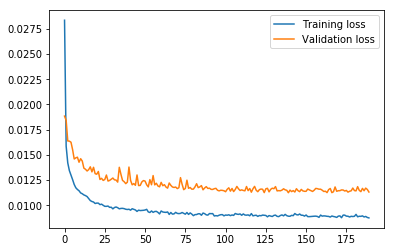

In [9]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [13]:
model.save("models/experimental/A-1.h5")

In [12]:
!pwd

/users/juanjose/git/Seq2SeqAnom


In [21]:
Y_train[0].size

25

In [83]:
X_train_pred = model.predict(X_train, verbose=1)

90/90 [==============================] - 1s 2ms/step


In [84]:
X_train_pred[0]

array([[ 9.9860448e-01, -2.3492915e-04, -4.7763584e-05, -2.6586550e-04,
         2.0411733e-04,  1.7765150e-03,  1.7505013e-04, -2.2148446e-04,
        -2.5317489e-04, -1.0624896e-04,  3.2701682e-05,  4.5945621e-05,
        -4.3974145e-05, -3.6656685e-04,  2.0801292e-04, -3.0440878e-04,
        -1.5865662e-05, -1.5860736e-04,  3.0441288e-04,  1.3508144e-04,
         3.6879352e-04, -1.5078802e-04, -2.5605957e-05, -1.9803467e-04,
         2.1783095e-04]], dtype=float32)

In [85]:
X_train[0]

array([[0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [89]:
np.abs(X_train_pred[0] - Y_train[0])

array([[3.95523548e-04, 1.00023493e+00, 4.77635840e-05, 1.00026587e+00,
        2.04117328e-04, 9.98223485e-01, 1.75050125e-04, 2.21484457e-04,
        2.53174891e-04, 1.06248961e-04, 3.27016824e-05, 4.59456205e-05,
        4.39741452e-05, 3.66566848e-04, 2.08012920e-04, 3.04408779e-04,
        1.58656621e-05, 1.58607363e-04, 3.04412883e-04, 9.99864919e-01,
        3.68793524e-04, 1.50788022e-04, 2.56059575e-05, 1.98034671e-04,
        2.17830951e-04]])

In [88]:
np.transpose(Y_train[0])

array([0.999, 1.   , 0.   , 1.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [90]:
X_train_pred[0]

array([[ 9.9860448e-01, -2.3492915e-04, -4.7763584e-05, -2.6586550e-04,
         2.0411733e-04,  1.7765150e-03,  1.7505013e-04, -2.2148446e-04,
        -2.5317489e-04, -1.0624896e-04,  3.2701682e-05,  4.5945621e-05,
        -4.3974145e-05, -3.6656685e-04,  2.0801292e-04, -3.0440878e-04,
        -1.5865662e-05, -1.5860736e-04,  3.0441288e-04,  1.3508144e-04,
         3.6879352e-04, -1.5078802e-04, -2.5605957e-05, -1.9803467e-04,
         2.1783095e-04]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot(ds.trainData['A-1'].y[81])

In [ ]:
import pandas as pd
import os

In [ ]:
lbls = pd.read_csv(os.path.join("data", "labeled_anomalies.csv"))

In [ ]:
labels_dict = {}
for rw in lbls.iterrows():
    labels_dict[rw[1]['chan_id']] = str2ary(rw[1]['anomaly_sequences'])

In [ ]:
def str2ary(str_):
    x = str_.replace("]","").replace("[","")
    x = x.split(",")
    assert(not len(x)%2)
    lst = []
    for i in range(0, len(x), 2):
        tmp  = range(int(x[i]), int(x[i+1]))
        lst.append(tmp)
    return lst

In [18]:
s = np.array([[1,2,3,4], [5,6,7,8]])
s.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
2155 in rs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

In [ ]:
x = generate_data()

In [ ]:
x.shape

In [ ]:
x[0]

In [ ]:
plt.plot(x)

In [ ]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

In [ ]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]

In [ ]:
x_test.shape

In [ ]:
x.shape

In [ ]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

In [ ]:
log_dens

In [ ]:
plt.plot(log_dens)

In [ ]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

In [ ]:
x_train.shape

In [ ]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [ ]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

In [ ]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

In [ ]:
grid.best_estimator_